In [22]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.externals import joblib

c:\users\ninad\anaconda3\envs\tensorflow1\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

In [3]:
#Reading the Dataset
df = pd.read_csv('moviereviews.tsv' , sep ="\t")
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [4]:
len(df)

2000

In [5]:
#Checking For NULL values
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
#Dropping All NULL Values
df.dropna(inplace=True)
len(df)

1965

In [7]:
#Getting The Blank Space Values
blank = []
for i,lb,rv in df.itertuples():
    if type(rv) == str:
        if rv.isspace()==True:
            blank.append(i)

print("The Blank index are",blank)

The Blank index are [57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


In [8]:
df.drop(blank,inplace=True)
len(df)

1938

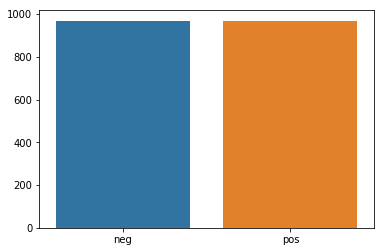

In [9]:
#Value Counts
df['label'].value_counts()
levels = Counter(df['label'])
sns.barplot(x = ['neg','pos'] , y = [levels['neg'],levels['pos']])

In [10]:
#intial Value Distribution
X = df['review']
Y = df['label']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

In [11]:
#Creating the Pipeline
text_svm = Pipeline([('tfidf',TfidfVectorizer(stop_words = stopwords )) , ('clf',LinearSVC())])
text_svm.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['a', 'about', 'an', 'and', 'are',
                                             'as', 'at', 'be', 'been', 'but',...
                                             'how', 'i', 'if', 'in', 'into',
                                             'is', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer

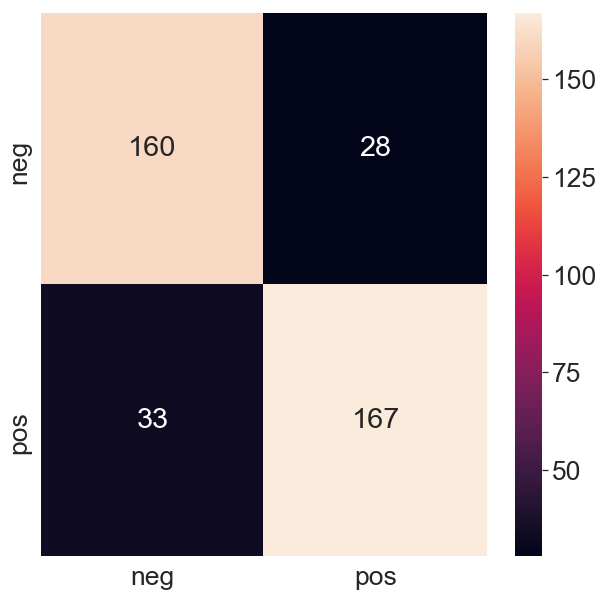

In [40]:
predict = text_svm.predict(x_test)
plt.figure(figsize = (10,10))
sns.set(font_scale=2.4)
sns.heatmap(confusion_matrix(y_test,predict),xticklabels=['neg','pos'],
           yticklabels=['neg','pos'],annot=True,fmt='.3g')

In [13]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         neg       0.83      0.85      0.84       188
         pos       0.86      0.83      0.85       200

    accuracy                           0.84       388
   macro avg       0.84      0.84      0.84       388
weighted avg       0.84      0.84      0.84       388



In [20]:
#Testing it on rondom text
text = "xcsfsgshd"
text_svm.predict([text])

array(['neg'], dtype=object)

In [23]:
#save the pipeline to reuse in the web-application
joblib.dump(text_svm, 'transform_predict.joblib')

['transform_predict.joblib']

In [26]:
pipeline = joblib.load('transform_predict.joblib') 
pipeline.predict([text])[0]

'neg'

In [31]:
chart_data = pd.DataFrame(
     np.random.randn(50, 3),
     columns=["a", "b", "c"])

,a,b,c
0,0.174627,1.447962,1.107386
1,0.489180,0.462253,0.956756
2,0.254313,1.109763,-0.503006
3,0.306437,-0.523448,1.934412
4,-0.561050,-1.040619,-0.748620
5,1.256244,0.607650,-0.379458
6,0.347089,0.886451,-0.836011
7,-1.771075,-1.622185,-0.060689
8,-1.040216,0.661828,-1.851972
9,-1.670981,-0.697950,-0.654257
